In [74]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch import nn

### PyTorch Workflow
Lets explore an example of PyTorch end-to-end workflow
<br>

In [75]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

In [76]:
from torch import nn # nn contains building all of PyTorchs building blocks for neural networks
# check PyTorch Version



## Data (Preparing and Loading)
Data can be almost anything... in machine learning/
* Excel spreadsheet
* Images of any kind
* Videos
* Audio
* DNA
<br>
Machine Learning is a game of two parts"
1. Get data into numerical representation.
2. Build a model to learn patters in that numerical representations
<br>

In [77]:
# Create *know* parameters
weight = 0.7
bias = 0.3


# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(1)
y = weight * X + bias
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting data into training and test sets

In [78]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, X_test = X[:train_split], X[train_split:]
y_train, y_test = y[:train_split], y[train_split:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### How to better visualize data:

In [79]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10,6))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        # Plot them if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={'size': 14})

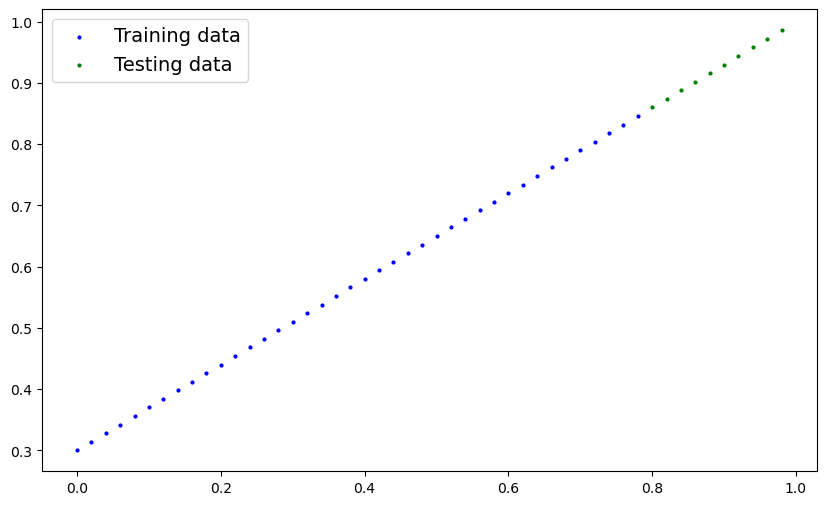

In [80]:
plot_predictions()

## 2. Build Model

In [81]:
class LinearRegressionModel(nn.Module): # <- almost everything in Pytorch inherits from nn.Module
    def __init__(self):
        super().__init__() #
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" is the input data
        return self.weights * x + self.bias # linear regression formula



### PyTorch model building essentials
* torch.nn - contains all of the building blocks for computational graphs
* torch.nn.parameters - what parameters should our model try and learn, often a Pytorch layer from torch.nn will set these for us
* torch.nn.Module -  THe base class for all neural network modules, if you subclass it, you should overwrite forward
* torch.optim - this is where the optimizers live, they will help with gradient descent
* torch.util.data.dataset - Represents a map between key (label) and sample (features) pairs of the data. Such as images and their associated labels
* torch.util.data.dataloader - Creates a python iterable over a torch dataset
*  def forward()- ALl nnn.module subclasses require you to overwrite forward(),

In [82]:
# Checking the contents of our PyTorch model

# Create a random seed
torch.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [83]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [84]:
weight, bias

(0.7, 0.3)

### Making predictions using 'torch.inference_mode()'
To check our model's predictive power, let's see how well it predicts 'y_test' base on 'x_test'
<br> When we pass data through our model, it's going to run through the 'forward()' method

In [85]:
# Make predictions with model
# Inference mode makes code faster, by not tracking grad.
# Same as .no_grad(), but with extra features.
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

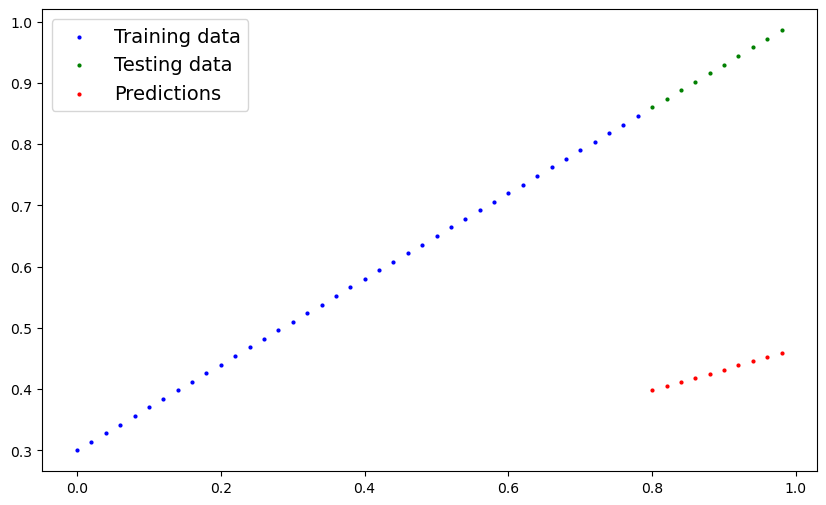

In [86]:
plot_predictions(predictions=y_preds)

## 3. Train model
<br> The whole idea of training is for a model to move from *unkown* parameters (these may be random) to soem *known* parameters
<br> Or in other words from a poor representation of the data to a better representation of the data
<br> One way to measure how poor or how wrong your models predictions are is to use a loss function
<br><br> Note: Loss Function may be also called cost function or criterion in different areas.
<br><br> Things we need to train: <br>
 <br>**Loss function:** A function to measure how wrong your model's predictions are to the ideas outputs, lower is better.
 <br> **Optimizer:** Takes into account the loss of  amodel and ajusts the model's parameters (e.g. weight and bias)
 <br> inside optimizers you'll often set two parameters:
 <br> * params- the model paraeters you'd like to optimize, for example "parmas=model_0.parameters()'
 <br> * lr (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer chjanges the parameters with each step ( small lr results in small change, big lr big changes)
 <br><br> And specifically for PyTorch we need:
 <br> A training loop
 <br> A testing loop

In [87]:
# Check out parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [88]:
# Setup a loss function
loss_fn = nn.MSELoss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)


### Building a training loop (and testing loop) in PyTorch
<br> A couple of things we need in a training loop:
<br> 0. Loop through the data
<br> 1. Forward pass (this involves data through the models "forward()' functions) also called forward propagation
<br> 2. Calculate the loss (compare forward pass predictions to ground truth labels)
<br> 3. Optimize zero grad
<br> 4. Loss backwards - Move backward through network to calculate the gradients of each parameter s of our model with respect to the loss (**backpropagation**)
<br> 5. Optimizer step - use the optimizer to adjust the modes's parameters to try and improve the loss (**gradient descent**)


In [89]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)
y_preds_new

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [90]:
# an epoch is one loop through the data... ( This is called a hyperparameters because we set them ourselvves)
epochs = 200

epoch_count = []
loss_values = []
train_loss_values = []

# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode in PyTorch set\s all parameters that require gradients to require gradients

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimize zero grad
    optimizer.zero_grad()

    # 4. perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer
    optimizer.step() # by default how the optimizer will accumulate through the loop

    model_0.eval # turns off different settings in the model not needed for evaluation/testing (dropout, batchNorm layers

    ### Testing
    model_0.eval() # turns off settings in the model not needed for evaluating/testing (dropout/bratch norm layers)
    with torch.inference_mode(): # turns off gradient tracking and a couple more things behind the scenes
        # 1. Do the forward pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

    # Print out model state_dict()
    print(model_0.state_dict())



Epoch: 0 | Loss: 0.10493002086877823 | Test Loss: 0.23639340698719025
OrderedDict({'weights': tensor([0.3395]), 'bias': tensor([0.1351])})
OrderedDict({'weights': tensor([0.3423]), 'bias': tensor([0.1412])})
OrderedDict({'weights': tensor([0.3450]), 'bias': tensor([0.1471])})
OrderedDict({'weights': tensor([0.3476]), 'bias': tensor([0.1530])})
OrderedDict({'weights': tensor([0.3502]), 'bias': tensor([0.1587])})
OrderedDict({'weights': tensor([0.3528]), 'bias': tensor([0.1642])})
OrderedDict({'weights': tensor([0.3553]), 'bias': tensor([0.1696])})
OrderedDict({'weights': tensor([0.3577]), 'bias': tensor([0.1749])})
OrderedDict({'weights': tensor([0.3601]), 'bias': tensor([0.1801])})
OrderedDict({'weights': tensor([0.3624]), 'bias': tensor([0.1852])})
Epoch: 10 | Loss: 0.06683927774429321 | Test Loss: 0.16711151599884033
OrderedDict({'weights': tensor([0.3647]), 'bias': tensor([0.1901])})
OrderedDict({'weights': tensor([0.3669]), 'bias': tensor([0.1949])})
OrderedDict({'weights': tensor(

ValueError: x and y must have same first dimension, but have shapes (20,) and (40,)

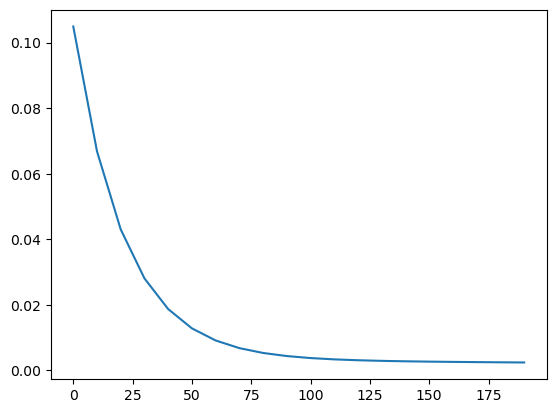

In [91]:
# Plot the loss curves
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

In [93]:
model_0.state_dict()


OrderedDict([('weights', tensor([0.4899])), ('bias', tensor([0.3830]))])

In [94]:
weight, bias

(0.7, 0.3)

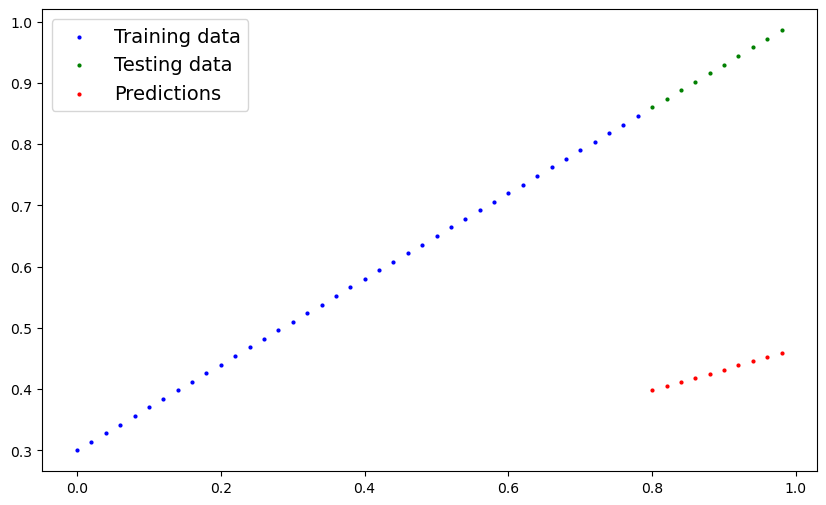

In [95]:
plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch
There are three main methods you should know about for saving and loading models in PyTorch.
1. 'torch.save()' - allows you to save a PyTorch object in Python's pickle format
2. 'torch.load()' - allows you to load a saved PyTorch object
3. 'torch.nn.Module.load_state_dict()' - this allows to load a model's saved state dictionary
<br> Extra work: find difference between saving state dict. vs loading whole model

In [96]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to models/01_pytorch_workflow_model_0.pth


### Loading PyTorch model
Since we saved our model's 'state_dict()' rather thant the entire model, we''' create a new instancw of our model class and load the saved 'state_dict()' into that

In [97]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [98]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.4899])), ('bias', tensor([0.3830]))])

In [100]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds


tensor([[0.7749],
        [0.7847],
        [0.7945],
        [0.8043],
        [0.8141],
        [0.8239],
        [0.8337],
        [0.8435],
        [0.8532],
        [0.8630]])

In [101]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [104]:
# Make some model preds
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

In [105]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together
Let's go back through the steps above and see it all in one place.

In [106]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check Pytorch version
torch.__version__

'2.7.1'

Create device-agnostic code.
<br><br> This means if we've got access to GPU, our code will use it (for potentially faster computing).
<br><br> If no GPU is available, the code will default to using CPU.


In [107]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


### 6.1 Data

In [108]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.2
bias = 0.1

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.1000],
         [0.1040],
         [0.1080],
         [0.1120],
         [0.1160],
         [0.1200],
         [0.1240],
         [0.1280],
         [0.1320],
         [0.1360]]))

In [109]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

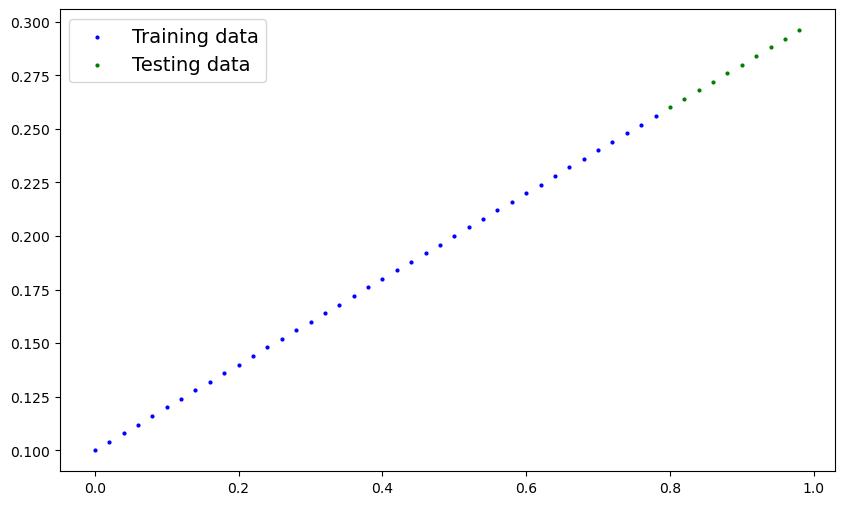

In [110]:
# Plot the data
# Note: if you don't have the plot predictions() function loaded, this will error
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building a PyTorch linear model


In [113]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [114]:
X_train[:5], y_train[:5]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.1000],
         [0.1040],
         [0.1080],
         [0.1120],
         [0.1160]]))

In [116]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### 6.3 Training
For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop